# Sistema de Cúmulos Globulares de M87

In [1]:
from astropy.io import fits

#Procederé a abrir las imágenes
Im1=fits.open('hst_9401_02_acs_wfc_f475w_drz.fits','readonly')
Im2=fits.open('hst_9401_02_acs_wfc_f850lp_drz.fits','readonly')

#Veré la información que contiene cada archivo.fits
Im1.info()
print "_________________________________________________________________________________________________________________________"
print " "
Im2.info()

Filename: hst_9401_02_acs_wfc_f475w_drz.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU     788   ()              
1    SCI         ImageHDU        85   (4238, 4213)   float32   
2    WHT         ImageHDU        47   (4238, 4213)   float32   
3    CTX         ImageHDU        40   (4238, 4213)   int32   
4    HDRTAB      BinTableHDU    631   4R x 311C    [9A, 3A, J, D, D, D, D, D, D, D, D, D, D, D, D, D, J, 3A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, J, 8A, 23A, D, D, D, D, J, J, J, 8A, J, 23A, 9A, 19A, J, 4A, J, J, J, J, J, J, 23A, D, D, D, D, J, J, 3A, 23A, 4A, 7A, J, D, D, D, 23A, 1A, J, D, D, D, 13A, 3A, 4A, 4A, 12A, 12A, 23A, 8A, 23A, 10A, 10A, D, D, 3A, 3A, 23A, 4A, 8A, 7A, 23A, D, J, D, 6A, 9A, 8A, D, D, J, 4A, 18A, 3A, J, 5A, 7A, 3A, D, 13A, 8A, 4A, 3A, J, J, J, J, J, J, J, D, D, D, D, D, D, 23A, 1A, D, 23A, D, D, D, 3A, 23A, J, 1A, 3A, 1A, D, 3A, 6A, J, D, D, D, D, D, D, D, D, D, D, 23A, D, D, D, D, 3A, D, 

In [2]:
#Observando el header para ver información relevante para los parámetros de SExtractor.
#Im1[0].header

In [3]:
#Guardo ahora las imágenes de ciencia y de peso:
Im1[1].writeto('sci_f475w_m87.fits',clobber=True)
Im1[2].writeto('invar_f475w_m87.fits',clobber=True)
Im2[1].writeto('sci_f850pl_m87.fits',clobber=True)
Im2[2].writeto('invar_f850pl_m87.fits',clobber=True)

In [4]:
Im1.close()
Im2.close()

## Corriendo SExtractor.

Una vez obtenidas las imágenes de ciencia y de inverso de la varianza, procedo a cambiar los parametros del archivo default.sex para luego correr SExtractor.

Los parámetros que cambié fueron:

- CATALOG_NAME: test_f475w.cat (o test_f850lp.cat)
- DETECT_MINAREA: 3
- DETECT_THRESH: 2.75
- PHOT_APERTURES: 7
- MAG_ZEROPOINT: 25.736 (F475W) ó 25.930 (F850LP) 
- GAIN: 2.0
- PIXEL_SCALE: 0.0
- WEIGHT_TYPE: MAP_WEIGHT
- WEIGHT_IMAGE: invar_filtro_m87.fits
- SEEING_FWHM: 0.120

Escogí **DETECT_MINAREA** igual 3 ya que para este caso encontré que es buen número para diferenciar estrellas de rayos cósmicos, luego fui probando con distintos valores de **DETECT_THRESH** para encontrar un buen valor, aquí comencé de un valor igual a 5 y fui bajando el valor, cuando llegué a 2 la detección de objetos aumentó mucho comparado con un valor de 3, esto quiere decir que ahí está el límite de una buena deteccion de estrellas.
Para **PHOT_APERTURES** abrí con ds9 una imágen de ciencia y ví el diámetro de un par de objetos y saqué un promedio de 7 pixeles. Para los valores del **GAIN** lo encontré en la siguiente página http://www.stsci.edu/hst/acs/documents/isrs/isr0401.pdf, y para **SEEING_FWHM** lo encontré en http://www.stsci.edu/hst/acs/documents/handbooks/current/c05_imaging4.html. **MAG_ZEROPOINT** lo obtuve en la siguiente página http://www.stsci.edu/hst/acs/documents/isrs/isr0702.pdf.

Utilizando SExtractor en la terminal obtuve:

juanito@juanito-op:~/Documentos/Experimental/TAREA5$ sex sci_f475w_m87.fits

----- SExtractor 2.8.6 started on 2016-11-25 at 18:02:03 with 1 thread

Measuring from: "Unnamed" [1/1] / 4238 x 4213 / 0 bits FLOATING POINT data
Weighting from: "Unnamed" [1/1] / 4238 x 4213 / 0 bits FLOATING POINT data
(M+D) Background: 0.167588   RMS: 0.0131859  / Threshold: 0.0362613  
Objects: detected 7573     / sextracted 5019                   
All done (in 3 s)

------------------------------------------------------------------------------------------------

juanito@juanito-op:~/Documentos/Experimental/TAREA5$ sex sci_f850pl_m87.fits

----- SExtractor 2.8.6 started on 2016-11-25 at 19:13:19 with 1 thread

Measuring from: "Unnamed" [1/1] / 4238 x 4213 / 0 bits FLOATING POINT data
Weighting from: "Unnamed" [1/1] / 4238 x 4213 / 0 bits FLOATING POINT data
(M+D) Background: 0.175354   RMS: 0.0133454  / Threshold: 0.0366998  
Objects: detected 11238    / sextracted 7331                   
All done (in 5 s)


## a) Histograma de Color

/home/juanito/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


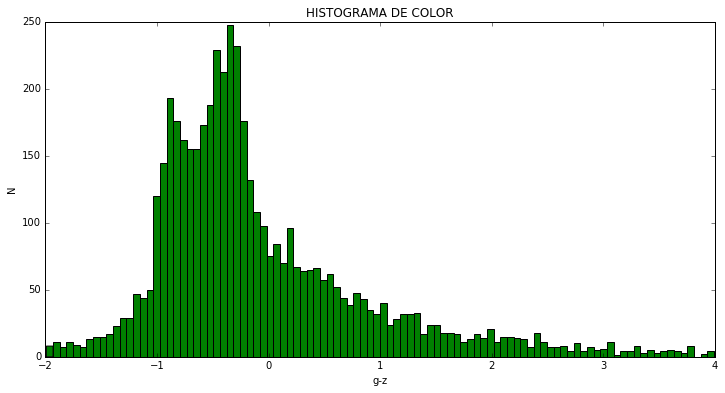

In [5]:
from astropy.coordinates import SkyCoord 
from astropy import units as u 
from astropy.io import ascii 
import numpy as np
import statistics
import matplotlib.pyplot as plt
%pylab inline

coords = []  
catalogos = []

cat_f475w = ascii.read('test_f475w.cat') 
catalogos.append(cat_f475w) 
coords.append(SkyCoord(ra=cat_f475w['ALPHA_J2000'], dec=cat_f475w['DELTA_J2000'],unit='deg'))

cat_f850lp = ascii.read('test_f850lp.cat') 
catalogos.append(cat_f850lp) 
coords.append(SkyCoord(ra=cat_f850lp['ALPHA_J2000'], dec=cat_f850lp['DELTA_J2000'],unit='deg'))

idx, d2d, d3d = SkyCoord.match_to_catalog_sky(coords[0], coords[1]) 

match = list(zip(range(0, len(idx)), idx, d2d)) 

idx1, idx2, d2d = zip(*match) 
catalogos[0] = catalogos[0][list(idx1)] 
catalogos[1] = catalogos[1][list(idx2)]

f475w = list(map(lambda x: x+0.076+0.44, catalogos[0]['MAG_APER'])) 
f850lp = list(map(lambda x: x+0.029+0.81, catalogos[1]['MAG_APER']))

##########################################  HISTOGRAMA  ####################################################

g_z=[] #Lista que contendrá la diferencia entre las magnitudes F474W y F850LP
for n in range(len(f475w)):
    dif=f475w[n]-f850lp[n]
    if dif > -2 and dif < 4:
        g_z.append(dif)
promedio=mean(g_z)
desv_standard=statistics.pstdev(g_z)
   
plt.subplots(figsize=(12,6))
plt.hist(g_z, 100, facecolor='green')
plt.title("HISTOGRAMA DE COLOR")
plt.xlabel("g-z")
plt.ylabel("N")

Es posible apreciar dos peaks en la distribución de los cúmulos globulares en m87, esto se debe a que hay 2 poblaciones de cúmulos globulares presente en esta galaxia. Estas 2 poblaciones pudieron haberse originado en dos momentos distintos, uno más antiguo que otro debido a que uno está más corrido hacia el azul.


## b)  Distancia

Para calcular distancias, necesito el peak de magnitud para cada filtro. Para esto es necesario plotear 2 histogramas para obtener los peaks.

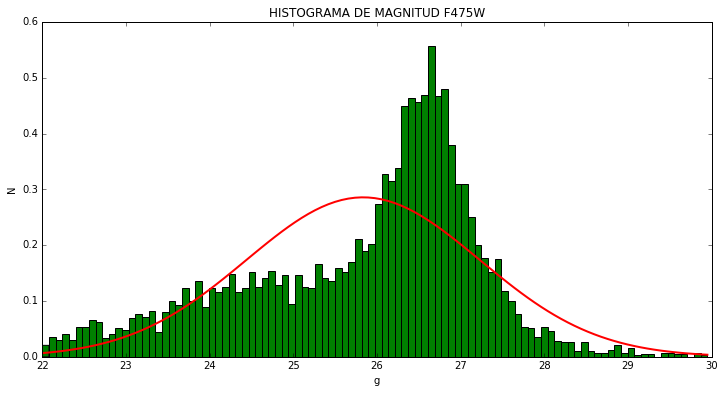

In [6]:
#### Histograma magnitud de F475W ###
Nf475w=[]
for n in range(len(f475w)):
    if f475w[n] > 22 and f475w[n] < 30:
        Nf475w.append(f475w[n])


promedio=mean(Nf475w)
desv_standard=statistics.pstdev(Nf475w)

plt.subplots(figsize=(12,6))
count, bins, ignored = plt.hist(Nf475w, 100, normed=True, facecolor='green')
plt.title("HISTOGRAMA DE MAGNITUD F475W")
plt.xlabel("g")
plt.ylabel("N")
## ajuste de gausseana
plt.plot(bins, 1/(desv_standard * np.sqrt(2 * np.pi)) * np.exp( - (bins - promedio)**2 / (2 * desv_standard**2) ), linewidth=2, color='r')
plt.show()

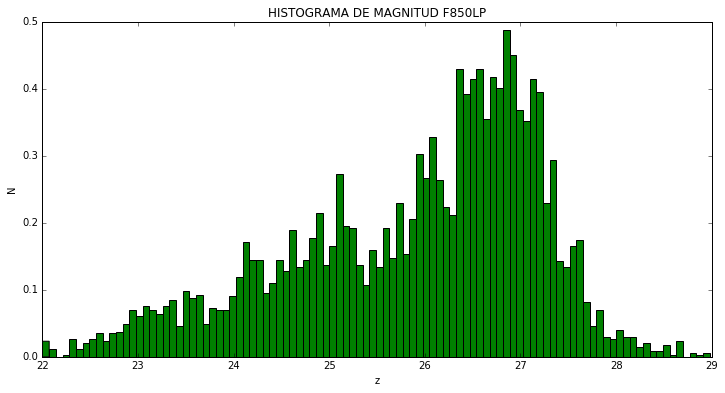

In [7]:
#### Histograma magnitud de F850LP ###
Nf850lp=[]
for n in range(len(f850lp)):
    if f850lp[n] > 22 and f850lp[n] < 29:
        Nf850lp.append(f850lp[n])

plt.subplots(figsize=(12,6))
plt.hist(Nf850lp, 100, normed=True, facecolor='green')
plt.title("HISTOGRAMA DE MAGNITUD F850LP")
plt.xlabel("z")
plt.ylabel("N")

Noto que en el primer histograma (F475W) el peaks es de ~26.6 mag, y en el segundo histograma (F850LP) el peak es ~26.9  mag. 

Ahora para encontrar la distancia a M87 es necesario usar el módulo de distancia: 

#### m - M = -5 + 5log(d)

despejando tengo:

#### $d = 10^{(\frac{m-M+5}{5})}$

Luego defino m ~ 26.75 (magnitud aparente que tomé como un promedio de ambos peaks) y la magnitud absoluta de M87 es $M_{V}$ = -7.4 así entonces:

In [8]:
m=26.75
Mv=-7.4

distancia=10**((m-Mv+5)/5) ##pc

print "La distancia a M87 es:", distancia/(10**6), "Mpc"

La distancia a M87 es: 67.6082975392 Mpc


## c) M87 en rayos X

La imágen en rayos X de M87 la obtuve de la siguiente página http://chandra.harvard.edu/photo/openFITS/xray_data.html.
El tiempor de observación fue de 146 horas.

In [9]:
m87_X=fits.open('m87_broadband.fits','readonly')
m87_X.info()

Filename: m87_broadband.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      18   (1550, 1550)   float32   


Para detectar fuentes, usé sextractor y cambíe los siguientes parámetros:
- DETECT_MINAREA: 3
- DETECT_THRESHOLD: 3
- PHOT_APERTURE: 2

y la detección fue la siguiente:

juanito@juanito-op:~/Documentos/Experimental/TAREA5$ sex m87_broadband.fits

----- SExtractor 2.8.6 started on 2016-11-27 at 23:23:03 with 1 thread

Measuring from: "Unnamed"  / 1550 x 1550 / 0 bits FLOATING POINT data
(M+D) Background: 6.29961e-06 RMS: 8.03056e-06 / Threshold: 2.40917e-05 
Objects: detected 1253     / sextracted 808 

La emisión en rayos X se da en fuentes que contienen gas _muy caliente_, y en galaxias puede prevenir, esta radiación, de alguna Supernova, disco de acreción de Agujero Negro o jets de emisión. Para el caso de una Supernova, es dificil detectar su tasa de emisión de rayos X debido a su espontaneidad, en cambio en un cúmulo globular es más factible esta detección debido a su alta densidad que provoca que las partículas que emiten estén bien energizadas.